# 1. **Introduction to Rasa NLU**

What is Rasa NLU? 
Rasa NLU is an open-source natural language processing tool for intent classification, response retrieval and entity extraction in chatbots. 
It can also be considered as a tool that can be used to understand short pieces of text. 

Let us consider an example of a chatbot that has been created for a university. Say a student wants to know who is teaching a particular course that he/she is planning to take this semester. How would someone frame a simple sentence asking for that information? It could go something like this: 

        I want to know who teaches the Machine Learning Course. 
        
                        OR
        
        Who teaches Machine Learning?
        
Of course, people would understand this question. To understand how the chatbot created with Rasa NLU understands the question or statement, we have the following structure: 

        {
          "intent": "faculty_search",
          "entities": {
            "course_name" : "Machine Learning"
          }
        }
        
Based on what kind of chatbot you are planning to creatge, you can create different intents and entities. 
Here's another example: 
Let's say you are looking for an Italian restaraunt. Then, the query structure would look like this:

        {
          "intent": "search_restaurant",
          "entities": {
            "cuisine" : "Italian"
          }
        }

# 2. **Installation guidelines:** 

Rasa Open Source can be installed using pip (requires Python 3.6 or 3.7).

        $ pip3 install rasa
        
(Preferably use virtual envs while working with Rasa)

Dependencies for spaCy can be installed with the following commands: 

        $ pip install rasa[spacy]
        $ python -m spacy download en_core_web_md
        $ python -m spacy link en_core_web_md en
(These commands install the latest versions of Rasa with spaCy)

For the purpose of this article, we will use the following version of rasa_nlu with spacy.

        #Rasa NLU
            python -m pip install rasa_nlu[spacy] (https://rasa.com/docs/nlu/installation/)
        #Rasa Core
            python -m pip install -U rasa_core
            (https://rasa.com/docs/core/installation/)
        #Language Model
            python -m spacy download en_core_web_md
            python -m spacy link en_core_web_md en --force;
            
Now that we have the necessary dependencies installed, let's begin working on building our system. 

# 3. **Starting the project** 

In order to create a brand new project run the command: 

       $ rasa init --no-prompt
      
The rasa init command creates all the files that a Rasa project needs and trains a simple bot on some sample data. If you leave out the "--no-prompt" flag you will be asked some questions about how you want your project to be set up.

Running the above command would give us a structure as follows: 

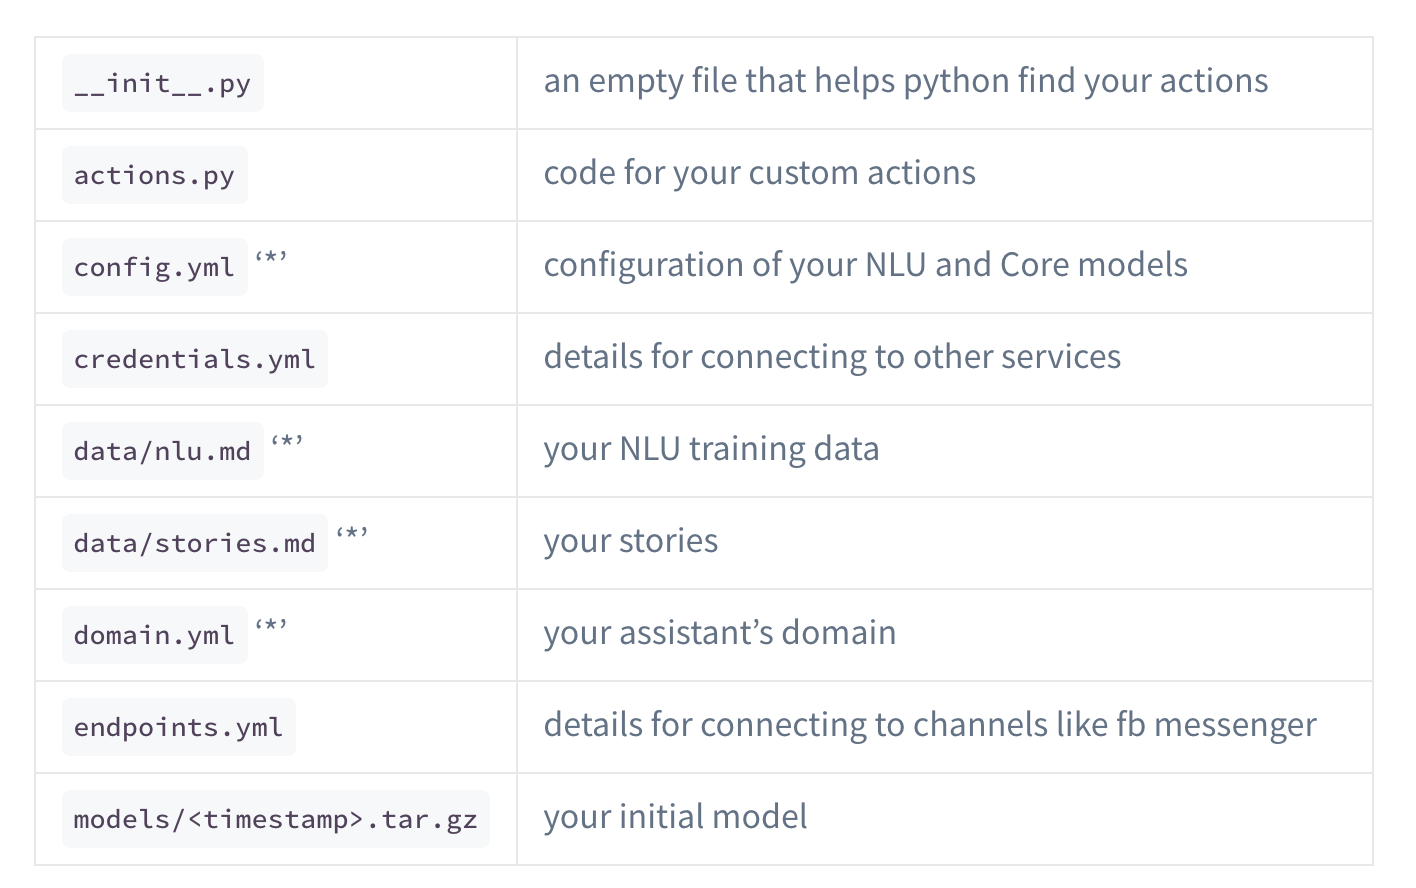

If you are just looking to create a simpler project just to understand how these systems work, then you only need to create the necessary files as and when necessary. 
For now, we will create just the training data file which is called "nlu.md" (It is a markdown file and can be stored in the same directory of the notebook for the purpose of this article).

# 4. Teaching the bot to understand language (Training the data)

The best way to train a bot is to obtain data from real users (like you and me) and we can do this by pretending to be the bot ourselves. 

We have already seen that our bot understands what the user is trying to say through intents and entities. 
    Intents are the gist of what the message is. It tells the system what the user is trying to say or what he is trying to ask. 
    Entities are smaller bits of information that tells the system the specifics of the question or statement. 
    
As mentioned before, we write the training data to the "nlu.md" file. (Remember that this is for this version of Rasa. In previous versions of Rasa, we had to write the intents and entities in a json format as shown above directly into a <filename>.json file)
    Lets write some basic intents. 

In [1]:
import rasa_nlu
import rasa_core
import spacy

:0: UserWarning: You do not have a working installation of the service_identity module: 'No module named 'service_identity''.  Please install it from <https://pypi.python.org/pypi/service_identity> and make sure all of its dependencies are satisfied.  Without the service_identity module, Twisted can perform only rudimentary TLS client hostname verification.  Many valid certificate/hostname mappings may be rejected.
//anaconda3/envs/cs670/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/cs670/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dty

In [2]:
import nest_asyncio

nest_asyncio.apply()

In [3]:
t_data = """
## intent:greet
- hey
- hello there
- hi
- hello there
- what's up
- yo

## intent:goodbye
- cu
- good by
- see you later
- take care
- talk to you later
- bye 
- goodbye
- good night

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct
- alright
- aight
- sure
- ok
- i see
- cool

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good
- good

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
"""

In [4]:
text_file = open("nlu.md", "w")
text_file.write(t_data)
text_file.close()

Next we write the configuration file. This configuration file contains some important information and parameters required to train the data in the *'nlu.md'* file. 

In [5]:
config = """
language: "en"

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

In [6]:
text_file = open("config.yml", "w")
text_file.write(config)
text_file.close()

Now that we have the files ready, we need to teach the system to understand what the different intents are and train it to be able to recognise them.
For example; if we were to greet the bot with a *'Hello'* or *'Hi'* it should be able to classify it as a greet intent.
Let us see how to train and check if it classifies it correctly. 

In [7]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("nlu.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


In [8]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

list_files(os.getcwd())

Spotlight/
    nlu.md
    stories_file.png
    t_data_json.png
    .DS_Store
    simple_story.png
    chat_ss.png
    Mukund Srinath Heragu_Rasa-NLU_April09.ipynb
    Spotlight.ipynb
    in_ac_tmp.png
    rasa_dir_structure.png
    domain_file.png
    config.yml
    domain.yml
    stories.md
    models/
        nlu/
            default/
                current/
                    training_data.json
                    metadata.json
                    component_4_SklearnIntentClassifier.pkl
                    component_5_EntitySynonymMapper.json
                    component_2_CRFEntityExtractor.pkl
        dialogue/
            domain.json
            metadata.json
            domain.yml
            policy_2_FallbackPolicy/
                fallback_policy.json
            policy_0_MemoizationPolicy/
                featurizer.json
                memorized_turns.json
            policy_1_KerasPolicy/
                keras_policy.json
                featurizer.json
                k

As we can see, the directory structure contains 
models/
    nlu/
        default/
            current
            which contains the *'training_data.json'* and this file contains the intents and entities in the json format previously mentioned. 
            If we were to open the *'training_data.json file'* it would look like this
       
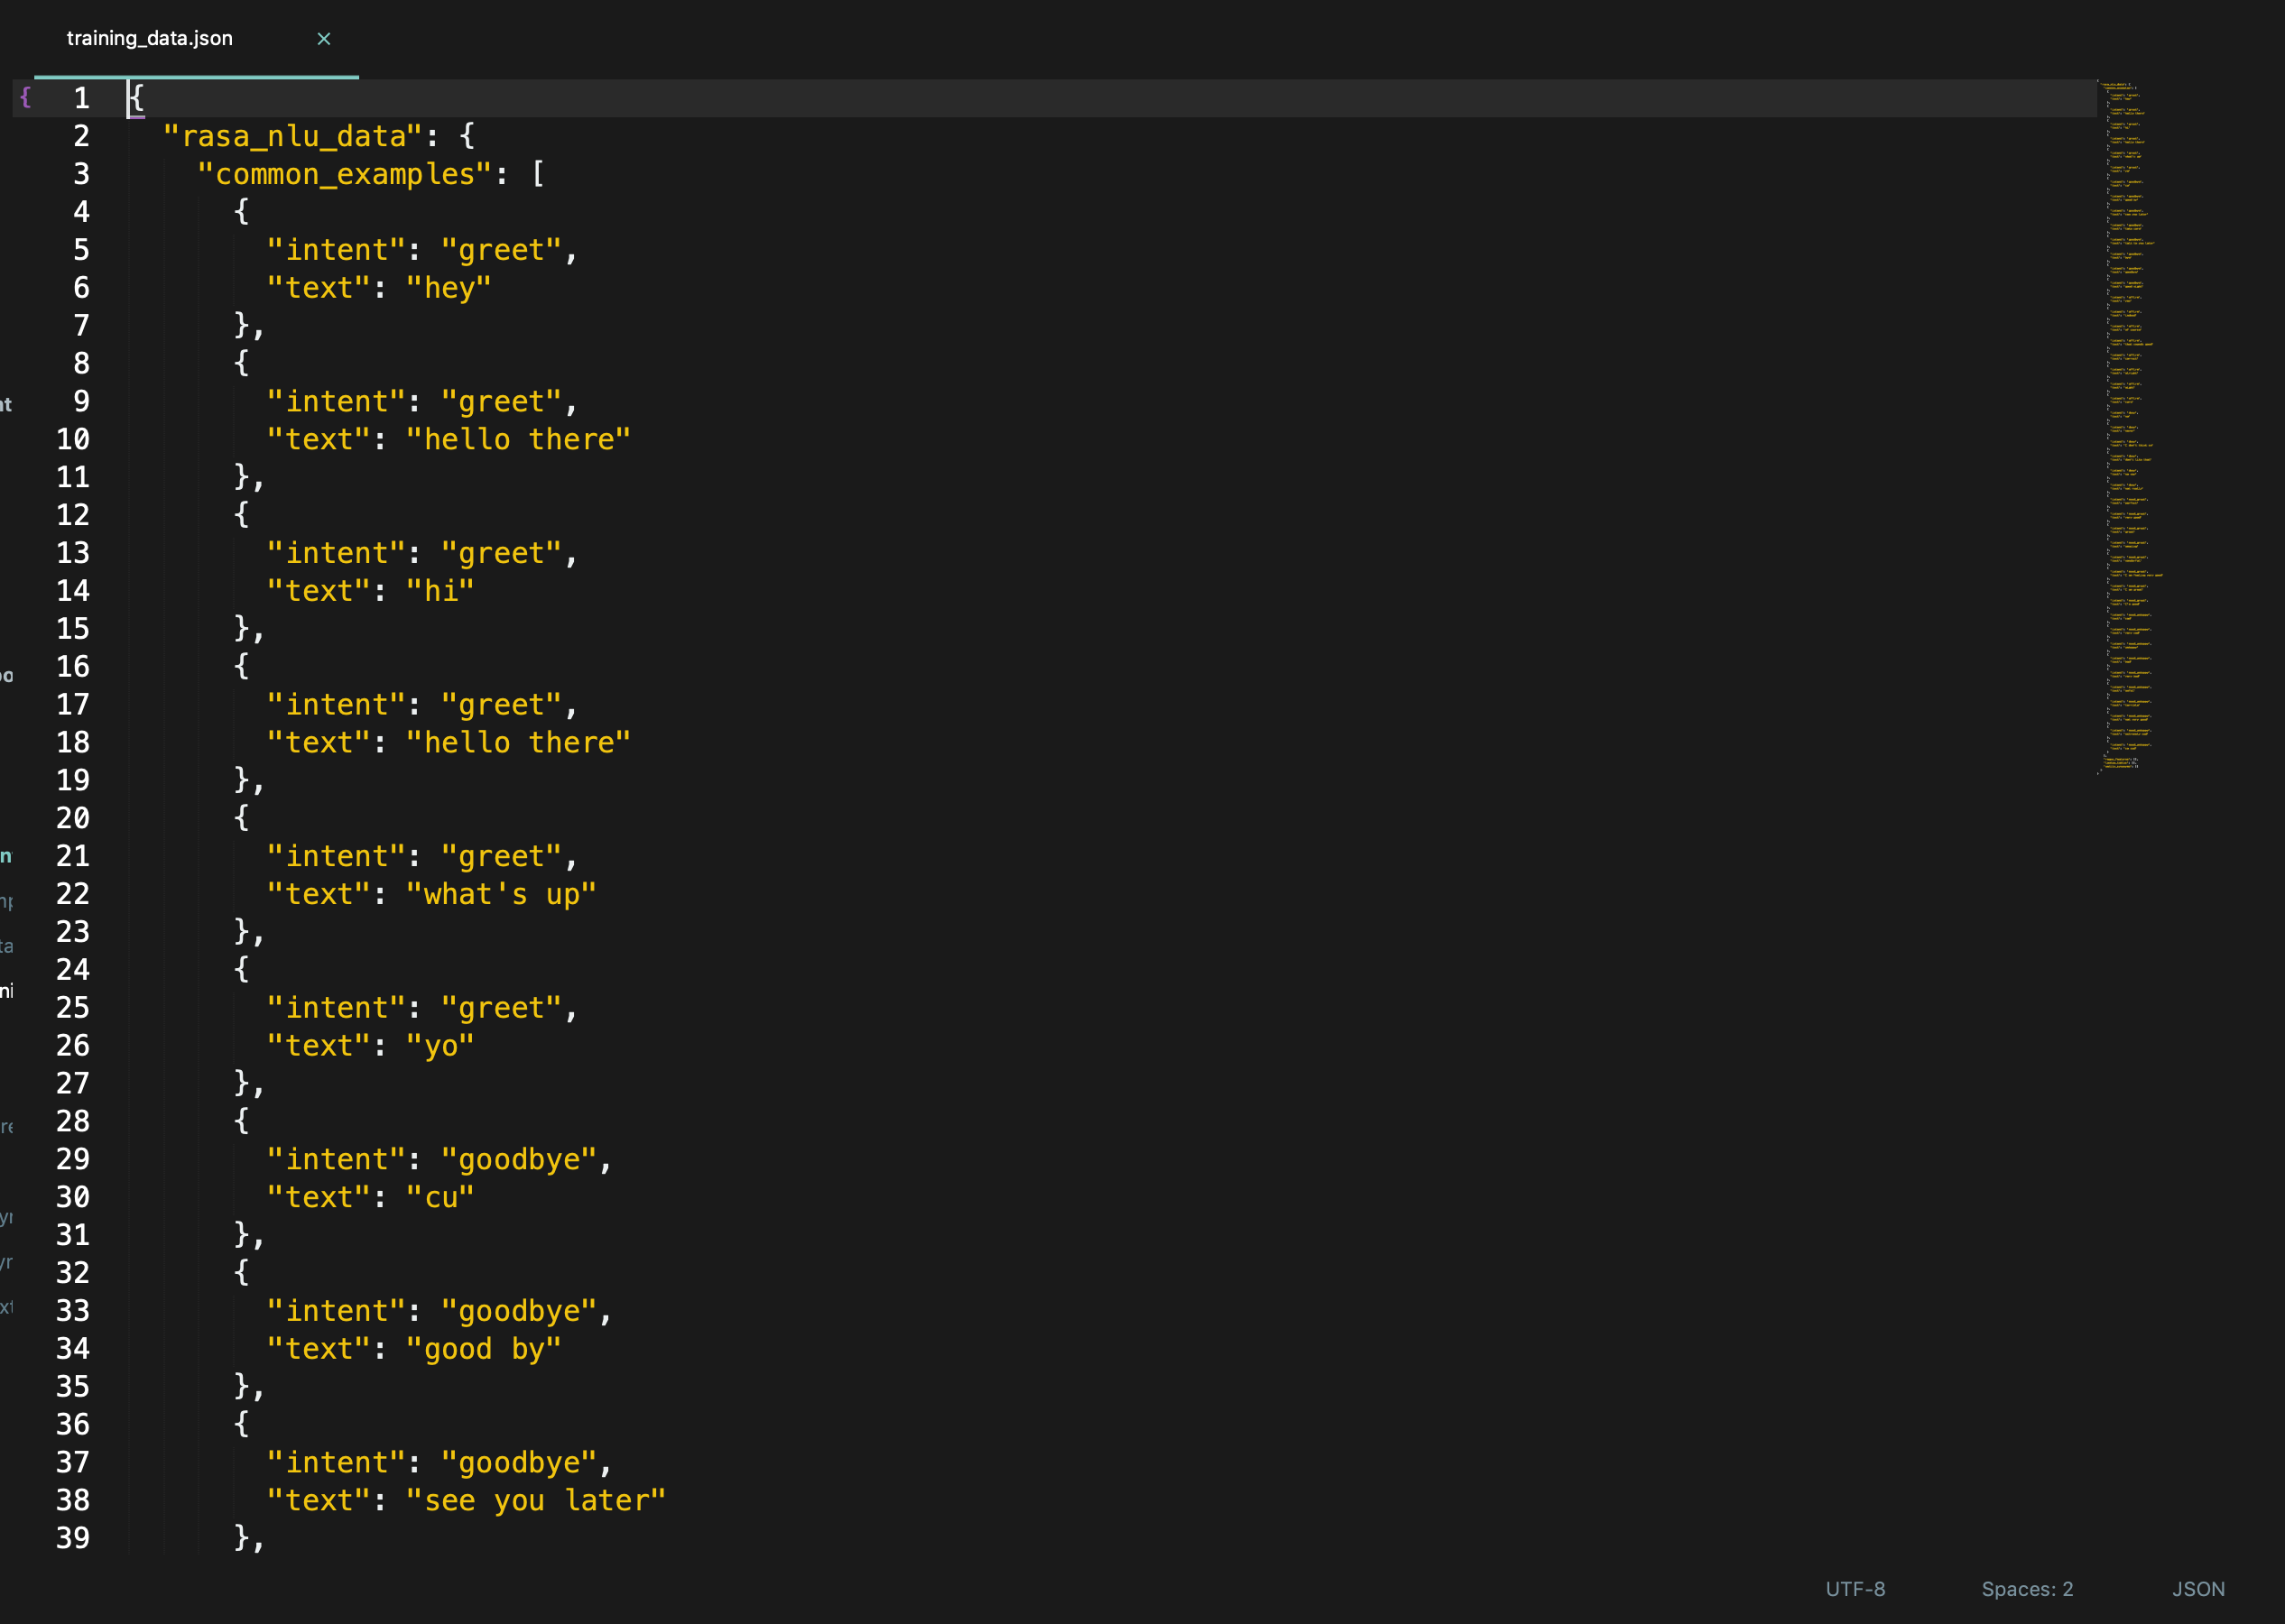

If you are currently using a much older version of Rasa NLU, then you could also directly add to the json file and train the json file separately. 

In order to make things simpler to add to the *'json file'*, here's another site that can be used to easily generate json formatted intents and entities.

https://rasahq.github.io/rasa-nlu-trainer/
    
Use the *'Add new example'* button to add new examples and type in your intents and select part of your statement to mark them as entities. 

In [9]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

In [10]:
def pprint(o):
   print(json.dumps(o, indent=2))

pprint(interpreter.parse("Hi"))

{
  "intent": {
    "name": "greet",
    "confidence": 0.6838117013842849
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "greet",
      "confidence": 0.6838117013842849
    },
    {
      "name": "affirm",
      "confidence": 0.11085328459551547
    },
    {
      "name": "goodbye",
      "confidence": 0.10119474181265808
    },
    {
      "name": "mood_great",
      "confidence": 0.0540831416389177
    },
    {
      "name": "mood_unhappy",
      "confidence": 0.038481768596984246
    },
    {
      "name": "deny",
      "confidence": 0.011575361971639235
    }
  ],
  "text": "Hi"
}


In [11]:
pprint(interpreter.parse("sad"))

{
  "intent": {
    "name": "mood_unhappy",
    "confidence": 0.9164557210633215
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "mood_unhappy",
      "confidence": 0.9164557210633215
    },
    {
      "name": "affirm",
      "confidence": 0.02406153850919561
    },
    {
      "name": "greet",
      "confidence": 0.019254009375371212
    },
    {
      "name": "goodbye",
      "confidence": 0.019223908470252578
    },
    {
      "name": "deny",
      "confidence": 0.013159405601506325
    },
    {
      "name": "mood_great",
      "confidence": 0.007845416980352949
    }
  ],
  "text": "sad"
}


In [12]:
pprint(interpreter.parse("perfect"))

{
  "intent": {
    "name": "mood_great",
    "confidence": 0.7243627082354812
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "mood_great",
      "confidence": 0.7243627082354812
    },
    {
      "name": "affirm",
      "confidence": 0.10746279415707728
    },
    {
      "name": "goodbye",
      "confidence": 0.06768753299841569
    },
    {
      "name": "mood_unhappy",
      "confidence": 0.04241356586288992
    },
    {
      "name": "greet",
      "confidence": 0.03426695878895194
    },
    {
      "name": "deny",
      "confidence": 0.02380643995718377
    }
  ],
  "text": "perfect"
}


In [13]:
pprint(interpreter.parse("indeed"))

{
  "intent": {
    "name": "affirm",
    "confidence": 0.7847443798990028
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "affirm",
      "confidence": 0.7847443798990028
    },
    {
      "name": "goodbye",
      "confidence": 0.05919174394442959
    },
    {
      "name": "deny",
      "confidence": 0.04887115625410356
    },
    {
      "name": "mood_unhappy",
      "confidence": 0.04244677374202729
    },
    {
      "name": "greet",
      "confidence": 0.03725864901619185
    },
    {
      "name": "mood_great",
      "confidence": 0.027487297144244877
    }
  ],
  "text": "indeed"
}


As you can see from the above examples, our bot is able to correctly classify what we type. It correctly classifies *'Hi'* with a confidence score of 0.68 and *'sad'* with a score of 0.91 and also classifies *'perfect'* with a score of 0.72 and *'indeed'* with a score of 0.784.

# 4. **Teaching the system to respond**

## *Stories*

Now that our bot can understand what we are trying to say, we need to teach it to respond based on what we type. 
We will teach the bot to respond based on a dialogue management model in Rasa core that we train. 

The training data in the dialogue management model is called stories. A story consists of an actual piece of conversation between an assistant and a user. Lines with intents and entities reflect the user’s input and action names show what the assistant should do in response.
A simple story woud look like this:

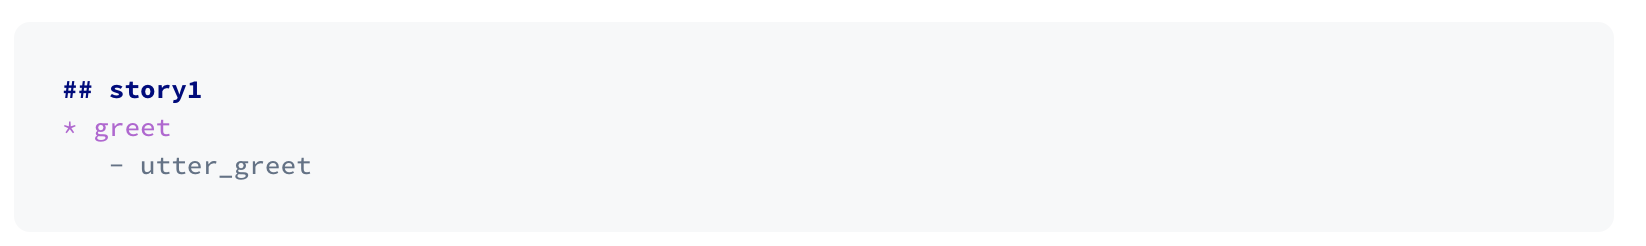

The user says *'Hi'* and the assistant replies Hi back. 

Lines that start with - are actions taken by the assistant. In this tutorial, all of our actions are messages sent back to the user, like utter_greet, but in general, an action can do anything, including calling an API and interacting with the outside world.

A simple stories file would look like this:

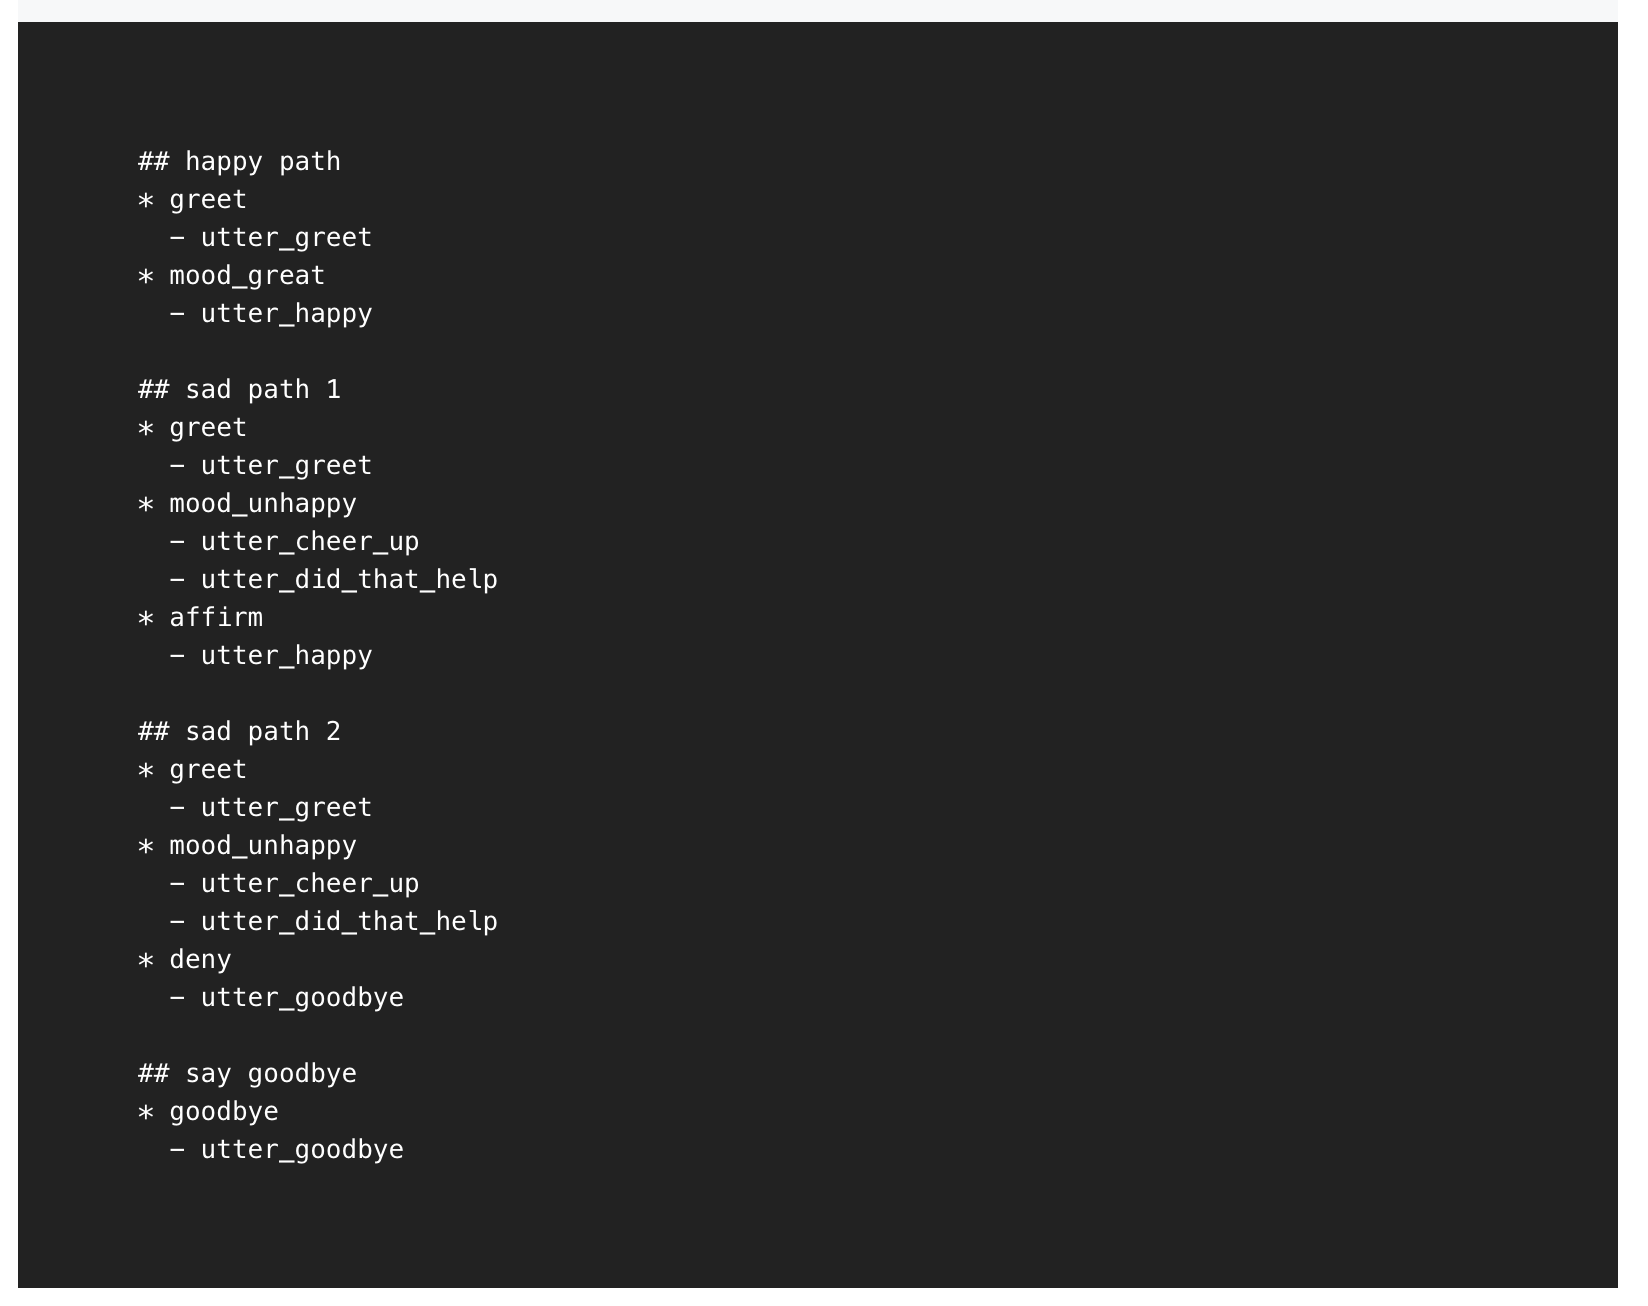



In [14]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* affirm
  - utter_happy
* affirm
  - utter_goodbye
  
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_ok
* affirm
  - utter_happy
  - utter_goodbye
  
## strange user
* affirm
  - utter_happy
* affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear
"""

In [15]:
text_file = open("stories.md", "w")
text_file.write(stories_md)
text_file.close()

## *Domains:*

The next thing to do is to define a *'Domain'*. The domain defines the universe your assistant lives in: what user inputs it should expect to get, what actions it should be able to predict, how to respond, and what information to store. The domain for our assistant is saved in a file called *'domain.yml'*. 

A typical *'domain.yml'* files looks like this. 

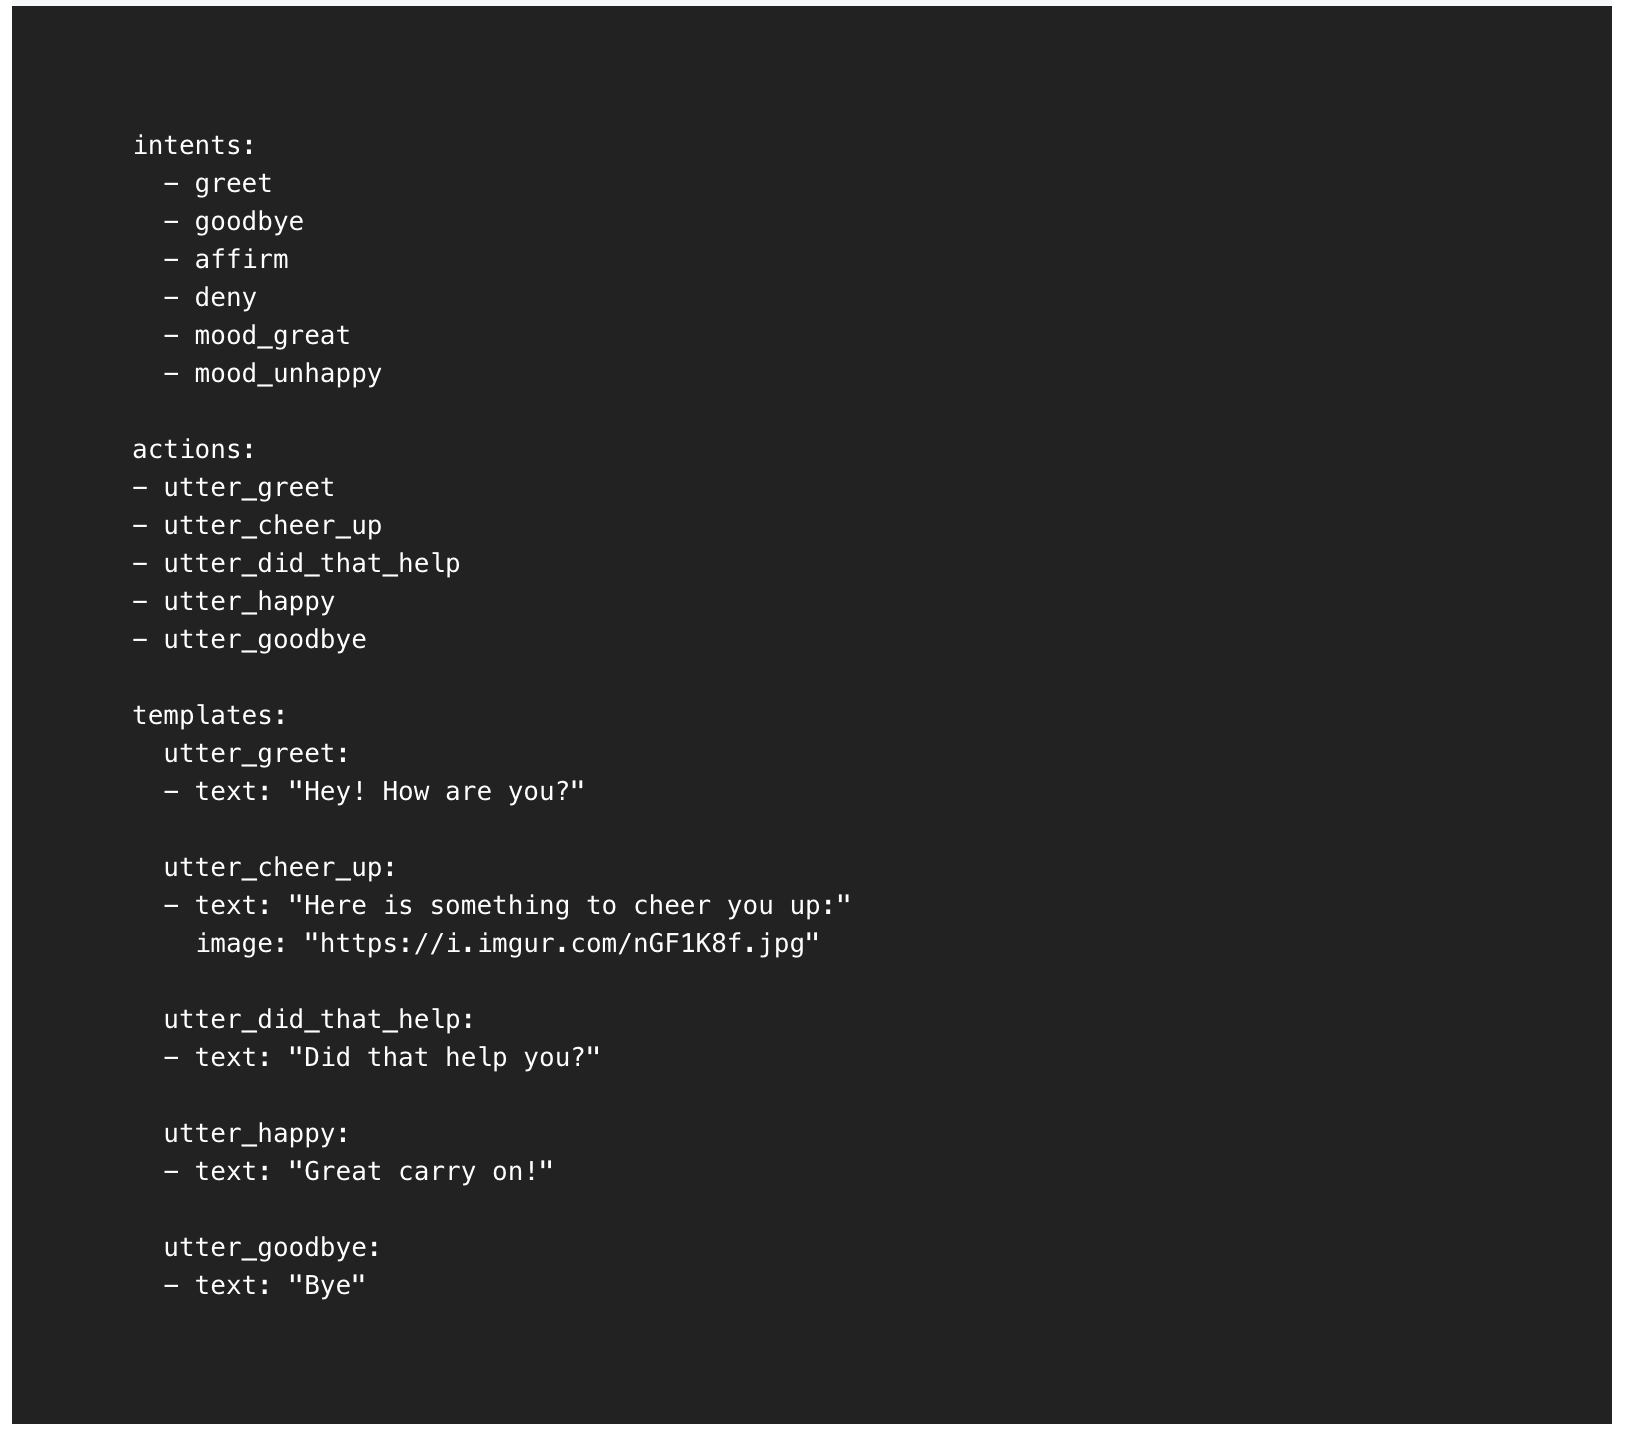

Each of the different parts of the domain file have their own importance.

<img src="in_ac_tmp.png" alt="Drawing" style="width: 700px;"/>


In [16]:
domain_yml = """
intents:
- greet
- goodbye
- affirm
- deny
- mood_great
- mood_unhappy

slots:
  group:
    type: text
    
entities:
- group

actions:
- utter_greet
- utter_did_that_help
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ok

templates:
  utter_greet:
  - text: "Hey! How are you?"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  
  utter_happy:
  - text: "Great carry on!"

  utter_goodbye:
  - text: "Bye"
  
  utter_ok:
  - text: "Everything ok?"
  """

In [17]:
text_file = open("domain.yml", "w")
text_file.write(domain_yml)
text_file.close()

## *Actions*

Actions are the things your bot runs in response to user input. There are four kinds of actions in Rasa:

1. Utterance actions: start with utter_ and send a specific message to the user.
2. Retrieval actions: start with respond_ and send a message selected by a retrieval model.
3. Custom actions: run arbitrary code and send any number of messages (or none).
4. Default actions: e.g. action_listen, action_restart, action_default_fallback.

### *Custom Actions*

An action can run any code you want. Custom actions can turn on the lights, add an event to a calendar, check a user’s bank balance, or anything else you can imagine.

Rasa will call an endpoint you can specify, when a custom action is predicted. This endpoint should be a webserver that reacts to this call, runs the code and optionally returns information to modify the dialogue state.


## *Training a Dialogue model:*

Final step in creating our assistant involves training our dialogue management model. This is done with the help of a recurrent Neural Network (RNN). In our example, we will be using Keras to build the neural network.
Anytime we add new NLU or Core data, or update the domain or configuration, we need to re-train a neural network on our example stories and NLU data. 

In [18]:
from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent
from rasa_core import training

from rasa_core.featurizers import (MaxHistoryTrackerFeaturizer,
                                   BinarySingleStateFeaturizer)

featurizer = MaxHistoryTrackerFeaturizer(BinarySingleStateFeaturizer(),
                                         max_history=5)

# this will catch predictions the model isn't very certain about
# there is a threshold for the NLU predictions as well as the action predictions
fallback = FallbackPolicy(fallback_action_name="utter_unclear",
                          core_threshold=0.2,
                          nlu_threshold=0.1)

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(validation_split = 0.0, epochs = 200), fallback])
training_data = agent.load_data('stories.md')

# agent = Agent('domain.yml', policies=[MemoizationPolicy(max_history=5), KerasPolicy()])

# loading our neatly defined training dialogues

agent.train(training_data)

agent.persist('models/dialogue')

INFO:apscheduler.scheduler:Scheduler started
Processed Story Blocks: 100%|██████████| 5/5 [00:00<00:00, 317.71it/s, # trackers=8]
Processed actions: 21it [00:00, 790.79it/s, # examples=19]


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:rasa_core.policies.keras_policy:Fitting model with 158 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 22)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                7040      
_________________________________________________________________
dense (Dense)                (None, 14)                462       
_________________________________________________________________
activation (Activation)      (None, 14)                0         
Total params: 7,502
Trainable params: 7,502
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Epoch 1/200
158/158 [==============================] - 1s 4ms/sample - loss: 2.5327 - acc: 0.2658
Epoch 2/200
158/158 [==============================] - 0s 255us/sample - loss: 2.4640 - acc: 0.4051
Epoch 3/200
158/158 [==============================] - 0s 269us/sample - loss: 2.3602 - acc: 0.4873
Epoch 4/200
158/158 [==============================] - 0s 233us/sample - loss: 2.2604 - acc: 0.5316
Epoch 5/200
158/158 [==============================] - 0s 268us/sample - loss: 2.1533 - acc: 0.5127
Epoch 6/200
158/158 [==============================] - 0s 252us/sample - loss: 2.0352 - acc: 0.5127
Epoch 7/200
158/158 [==============================] - 0s 209us/sample - loss: 1.9164 - acc: 0.5190
Epoch 8/200
158/158 [==============================] - 0s 173us/sample - loss: 1.8112 - acc: 0.5190
Epoch 9/200
158/158 [==============================] - 0s 172us/sample - loss: 1.7459 - acc: 0.5190
Epoch 10/200
158/158 [==============================] - 0s 169us/sample - loss: 1.6991 - acc: 0.5190
E

158/158 [==============================] - 0s 182us/sample - loss: 0.2321 - acc: 0.9304
Epoch 163/200
158/158 [==============================] - 0s 166us/sample - loss: 0.2439 - acc: 0.9241
Epoch 164/200
158/158 [==============================] - 0s 173us/sample - loss: 0.2509 - acc: 0.8987
Epoch 165/200
158/158 [==============================] - 0s 166us/sample - loss: 0.2448 - acc: 0.9114
Epoch 166/200
158/158 [==============================] - 0s 178us/sample - loss: 0.2409 - acc: 0.8987
Epoch 167/200
158/158 [==============================] - 0s 164us/sample - loss: 0.2610 - acc: 0.9114
Epoch 168/200
158/158 [==============================] - 0s 163us/sample - loss: 0.1959 - acc: 0.9430
Epoch 169/200
158/158 [==============================] - 0s 179us/sample - loss: 0.2165 - acc: 0.9367
Epoch 170/200
158/158 [==============================] - 0s 163us/sample - loss: 0.1919 - acc: 0.9241
Epoch 171/200
158/158 [==============================] - 0s 163us/sample - loss: 0.2392 - acc: 0

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to '/Users/msheragu/Documents/Spring 2020/IR/Spotlight/models/dialogue'


### *Start talking to the assistant*

Now that we have completed training our assistant, we can visualise how the assistant responds to our messages. 

In [19]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



INFO:rasa_nlu.components:Added 'SpacyNLP' to component cache. Key 'SpacyNLP-en'.


Here's how it will look if you run the following code

<img src="chat_ss.png" alt="Drawing" style="width: 700px;"/>

In [21]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
hi
Hey! How are you?
good
Everything ok?
yeah
Great carry on!
Bye
stop


# Conclusion:

Rasa NLU is a very useful python library that can be used to work on a wide range of topics. It can be combined with mutiple other libraries to help tackle a large number of problem statements. 

We have seen how to create and get our assistant working. By writing different custom actions, we can provide a lot of functionality to our assistant, ranging from simple tasks like getting a weather report or searching google for some information, to using the assistant to take down notes and set reminders. 

## *References*

https://rasa.com/docs/rasa/user-guide/rasa-tutorial/

Building a Conversational Chatbot for Slack using Rasa and Python - Medium

Beginner’s Guide to Building ChatBot using Rasa NLU - Medium


